In [ ]:
#Testing our training model(mobilenet)

In [40]:
cd C:\Users\harsha.teja\Desktop\myg\Test\convertics\indian-actor-dataset

C:\Users\harsha.teja\Desktop\myg\Test\convertics\indian-actor-dataset


In [41]:
#Import all the Dependencies
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os
from tensorflow import keras 

In [96]:
#preparing Dataset
image_size = (160, 160)
batch_size = 32

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "train",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "train",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 4694 files belonging to 135 classes.
Using 3756 files for training.
Found 4694 files belonging to 135 classes.
Using 938 files for validation.


In [97]:
#getting class names
class_names =train_dataset.class_names

In [43]:
# Loading our trained model, including its weights and the optimizer
model = tf.keras.models.load_model('saved_models/mobilenet.h5')

In [54]:
#evaluating our model on valdation dataset
results = model.evaluate(validation_dataset)

print('{:<20} {:<20}'.format('valdation loss', 'validation accuracy'))
print('{:<20} {:<20}'.format(np.round(results[0], 2), np.round(results[1], 2)))

30/30 [==============================] - 48s 1s/step - loss: 0.3404 - accuracy: 0.9200
valdation loss       validation accuracy 
0.34                 0.92                


In [98]:
#evaluating our model on train_dataset
results = model.evaluate(train_dataset)

print('{:<20} {:<20}'.format('train loss', 'train accuracy'))
print('{:<20} {:<20}'.format(np.round(results[0], 2), np.round(results[1], 2)))

118/118 [==============================] - 167s 1s/step - loss: 0.3725 - accuracy: 0.9100
train loss           train accuracy      
0.37                 0.91                


In [56]:
#predicting on single image 
img_path = r"C:\Users\harsha.teja\Desktop\myg\Test\convertics\indian-actor-dataset\test\66bc0ba5e1.jpg"

from tensorflow.keras.preprocessing import image    
img_array = image.load_img(img_path,target_size = (160,160,3))
img_array = image.img_to_array(img_array)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
#prob = model.predict_proba(img_array)
predicted_class = class_names[np.argmax(predictions[0])]
#confidence = round(100 * (np.max(predictions[0])), 2)
confidence = tf.nn.softmax(predictions[0])
confidence = 100 * np.max(confidence)

print(predicted_class)
print(confidence)
#print(prob)

amjad_khan
96.97645902633667


In [57]:
#predicting on single image 
path = r"C:\Users\harsha.teja\Desktop\myg\Test\convertics\indian-actor-dataset\test\66bc0ba5e1.jpg"

img = tf.keras.utils.load_img(
    path, target_size=(160,160)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to amjad_khan with a 96.98 percent confidence.


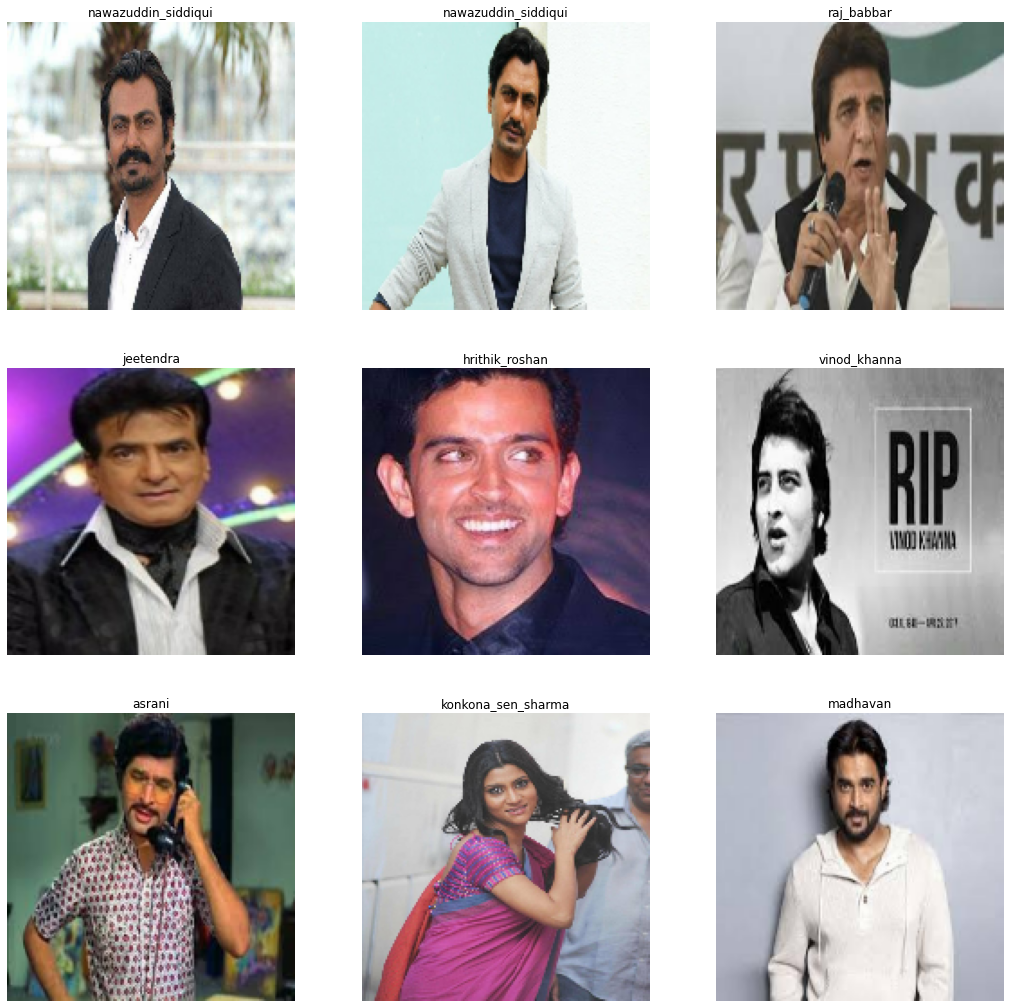

In [61]:
# Plot prediction results

image_batch, label_batch = validation_dataset.as_numpy_iterator().next()
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)

plt.figure(figsize=(18, 18))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(class_names[predicted_id[i]])
    plt.axis("off")

In [79]:
#predicting and ploting with predication results
img_height, img_width = 160,160
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    #confidence = round(100 * (np.max(predictions[0])), 2)
    confidence = tf.nn.softmax(predictions[0])
    confidence = round(100 * (np.max(confidence)),2)
    return predicted_class, confidence


C:\Users\harsha.teja\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


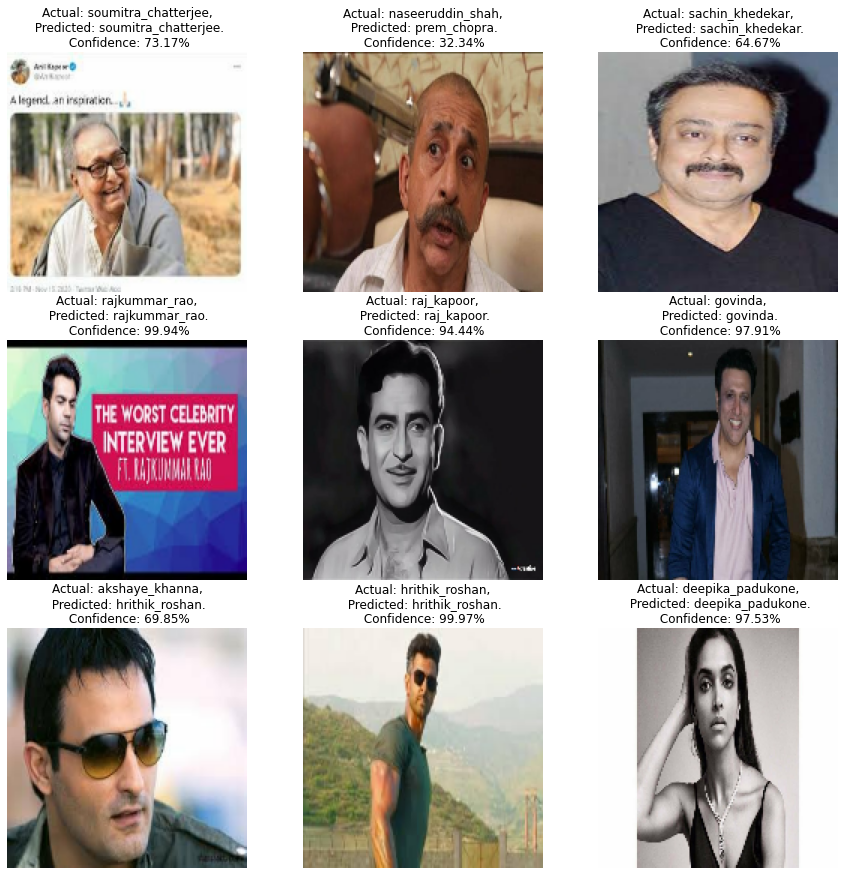

In [80]:
plt.figure(figsize=(15, 15))
for images, labels in validation_dataset.take(12):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

C:\Users\harsha.teja\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


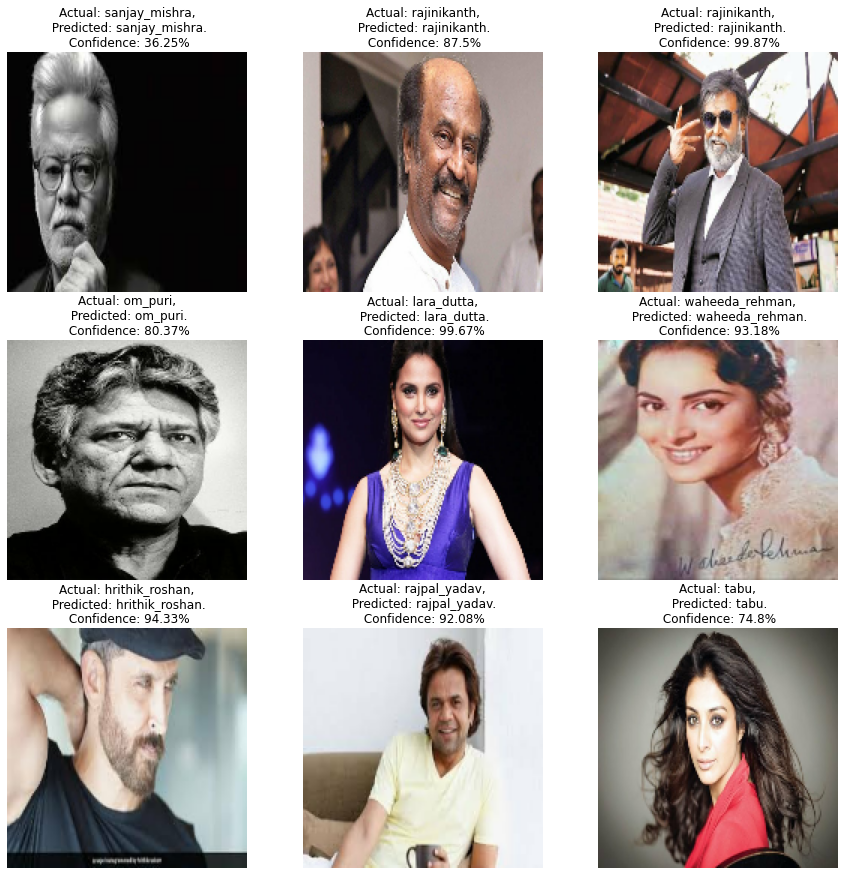

In [81]:
plt.figure(figsize=(15, 15))
for images, labels in validation_dataset.take(2):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

C:\Users\harsha.teja\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


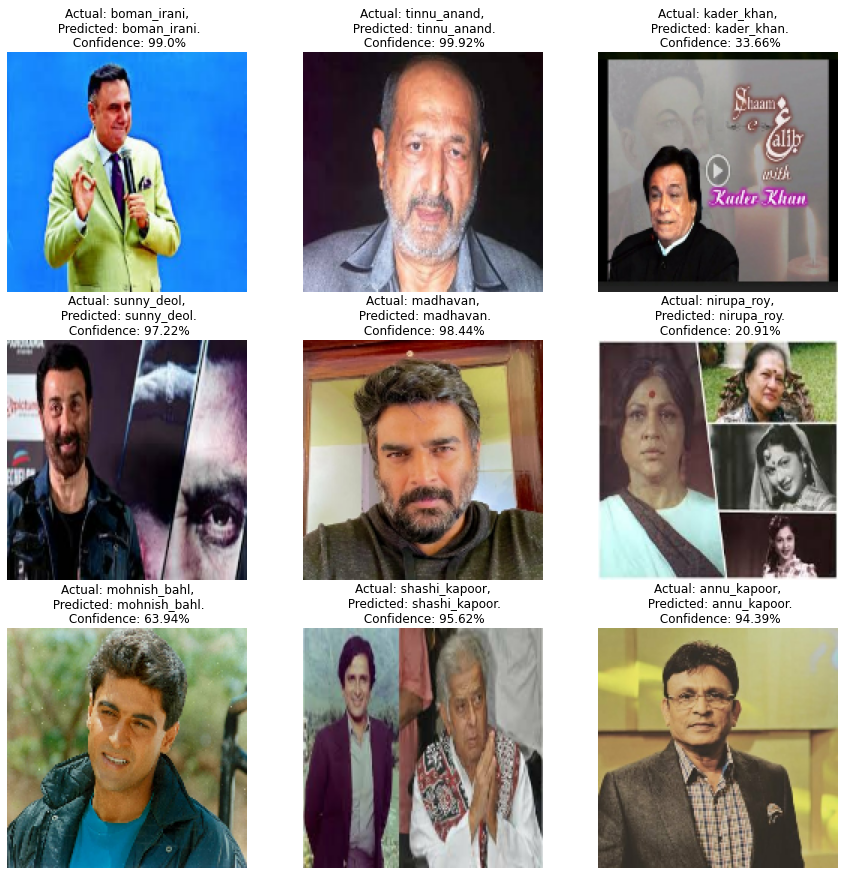

In [82]:
plt.figure(figsize=(15, 15))
for images, labels in validation_dataset.take(3):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
#class names and sampling a few images
classes = train_dataset.class_names
validationtestClasses= validation_dataset.class_names

In [ ]:
#testing with the 

In [ ]:
img_height, img_width = 160,160
batch_size =32
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
   
    subset='training') # set as training data


In [178]:

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()
test_generator = datagen.flow_from_directory('.', classes=['test'],target_size=(160, 160),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42)

Found 1848 images belonging to 1 classes.


In [88]:
#predict test data
y = model.predict(validation_dataset)
y =  np.argmax(y,axis= 1 )


In [89]:
#y_true and y_pred
y_true = np.array([])
y_pred = np.array([])

i = 0
for data, labels in validation_dataset:
  i += 1
  y = np.argmax(model.predict(data), axis=1)
  y_true = np.append(y_true, labels)
  y_pred = np.append(y_pred, y)
  
  

In [90]:
from sklearn.metrics import confusion_matrix , classification_report
cm  = confusion_matrix(y_pred,y_true)


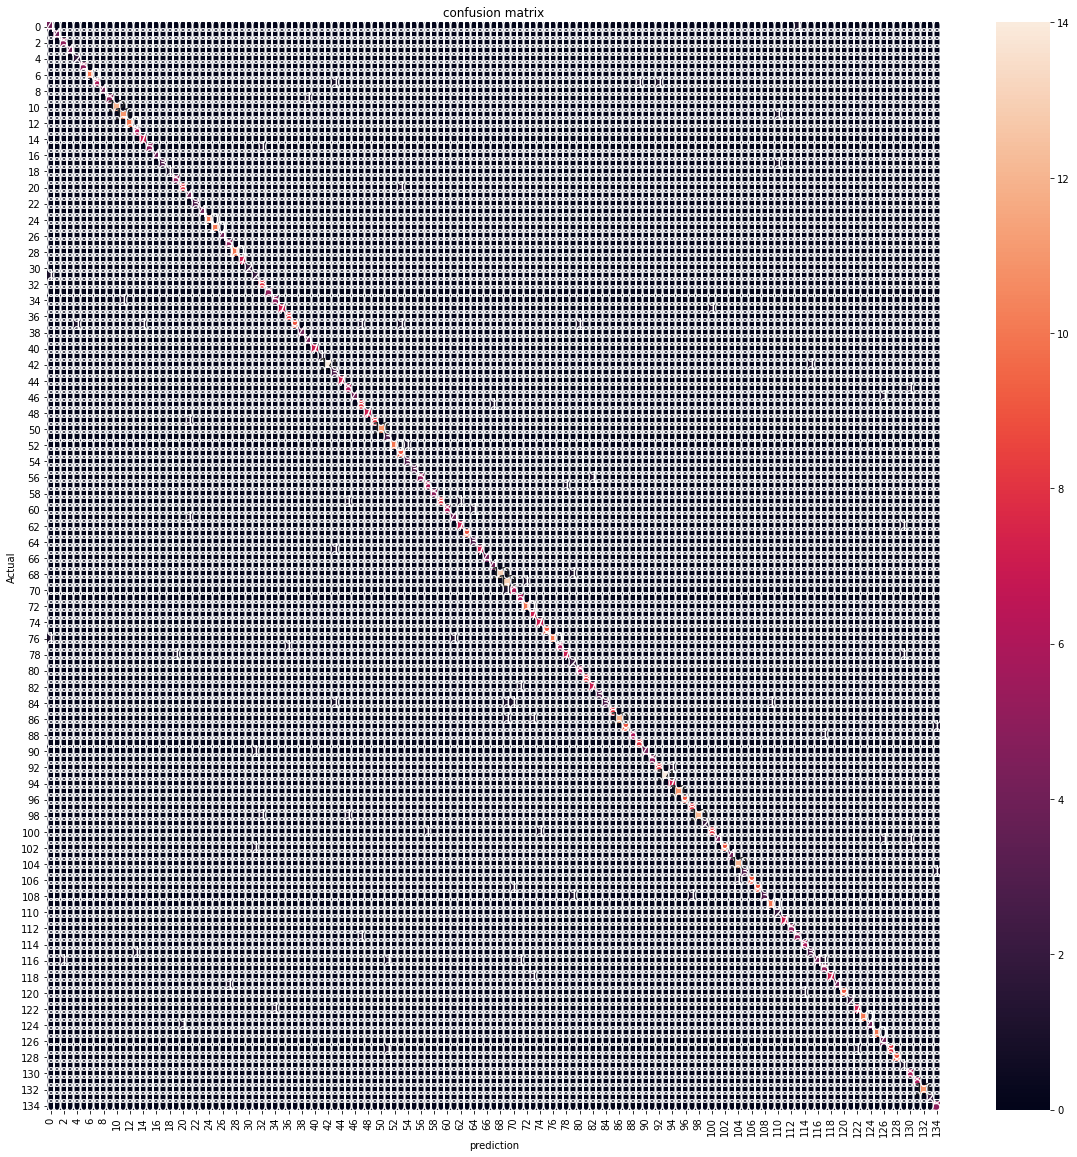

In [91]:
import seaborn
plt.figure(figsize =(20,20))
seaborn .heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

In [95]:

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix,accuracy_score



# Print f1, precision, and recall scores
precision=precision_score(y_pred,y_true,average="micro")
recall = recall_score(y_pred,y_true ,average="micro")
f1_micro_score = f1_score(y_pred,y_true,average="micro")
accuracy_score = accuracy_score(y_pred,y_true)

#print("precision is: {:.2f}".format(precision))
#print("recall is: {:.2f}".format(recall ))
print("f1_micro_score: {:.2f}".format(f1_micro_score*100 ))
print("accuracy_score is: {:.2f}".format(accuracy_score*100))

f1_micro_score: 92.00
accuracy_score is: 92.00


In [ ]:
#testing with Testing data

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
img_height, img_width = 160,160
batch_size =32
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
   
    subset='training') # set as training data


In [ ]:
class_names =np.array(train_dataset.class_names)

In [188]:
test  = tf.keras.utils.image_dataset_from_directory(
    'test', labels='inferred', label_mode=None,
    class_names=None, color_mode='rgb', batch_size=1, image_size=(160,
    160), shuffle=True, seed=None, validation_split=None, subset=None,
    interpolation='bilinear', follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1848 files belonging to 1 classes.


In [203]:
#STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
#test.reset()
pred= model.predict(test,verbose=1)

1848/1848 [==============================] - 82s 44ms/step


In [133]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in pred]


In [144]:

filenames = test.file_paths
results=pd.DataFrame({"Filename":filenames,
                      "Predictions_class":predictions,
                      "probality_class":pred 
                     })
results.to_csv("submission.csv",index=False)

In [137]:
results

Filename   Predictions_class  probality_class
0     test\30336c7ab7.jpg  mithun_chakraborty               60
1     test\1550f10789.jpg       randeep_hooda              100
2     test\3550a12fe2.jpg      kangana_ranaut               48
3     test\fb95f033d4.jpg                tabu              126
4     test\abadaf8f65.jpg             om_puri               74
...                   ...                 ...              ...
1843  test\7f828bf430.jpg    riteish_deshmukh              108
1844  test\f1fe308c7c.jpg      kangana_ranaut               48
1845  test\3cf9d71e4e.jpg         annu_kapoor               11
1846  test\79fb70036a.jpg         chiranjeevi               21
1847  test\15832e7ea4.jpg       mita_vashisht               59

[1848 rows x 3 columns]

In [112]:
results.to_csv("submission_new.csv",index=False)